# Does Higher <font color= 'olivedrab'>Median Income </font>Mean Higher <font color= 'goldenrod'>Test Scores</font>?
***
## Data Analysis based on IRS Median Household Income and Indiana Department of Education Data Reports
#### Brent Thomas, Matt Houser, Chelsea Snedden, Emmanuel Olofinkua
#### Sources of Data for Analysis:
#### &#8226; [IRS Individual Income Tax Statistics by Zip Code, 2017](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2017-zip-code-data-soi)
#### &#8226; [Indiana DOE School Corporation Data, 2017](https://www.doe.in.gov/accountability/find-school-and-corporation-data-reports)




In [53]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json
from io import StringIO
import numpy as np
import matplotlib
# File to Load (Remember to Change These)
school_data = "INSchoolDataCopy.csv"
test_score_data = "SchoolCorpDataRefined.csv"
income_data = "IncomeUpdateRefined.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data)
test_score_data = pd.read_csv(test_score_data)
income_data = pd.read_csv(income_data)
# Combine the data into a single dataset
school_complete = pd.merge(school_data, test_score_data, how="left", on=["ID", "ID"])


FileNotFoundError: [Errno 2] File b'INSchoolDataCopy.csv' does not exist: b'INSchoolDataCopy.csv'

In [2]:
school_complete


,ID,District Name,Mailing Address,City,State,ZIP,Overall Points,Overall Grade
0,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN
1,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B
2,5265.0,ALEXANDRIA COM SCHOOL CORP,202 E WASHINGTON ST,ALEXANDRIA,IN,46001,73.2,C
3,5275.0,ANDERSON COMMUNITY SCHOOL CORP,1600 HILLCREST AVE,ANDERSON,IN,46011,72.4,C
4,9790.0,ANDERSON PREPARATORY ACADEMY,3205 W 25TH ST,ANDERSON,IN,46011,NaN,NaN
...,...,...,...,...,...,...,...,...
403,8665.0,WHITLEY CO CONS SCHOOLS,107 N WALNUT ST,COLUMBIA CITY,IN,46725,81.7,B
404,9540.0,WILSON EDUCATION CTR CORP,PO BOX 217,CHARLESTOWN,IN,47111,NaN,NaN
405,9845.0,XAVIER SCHOOL OF EXCELLENCE,850 W JACKSON BLVD STE 850,CHICAGO,IN,60607,NaN,NaN
406,1910.0,YORKTOWN COMMUNITY SCHOOLS,2311 S BROADWAY ST,YORKTOWN,IN,47396,86.3,B


In [3]:
school_income_complete = pd.merge(school_complete, income_data, how="left", on=["ZIP", "ZIP"])
school_income_complete



,ID,District Name,Mailing Address,City,State,ZIP,Overall Points,Overall Grade,Adjust Gross Income,Number of returns,Amount
0,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,"551,529","4,150","559,279"
1,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,13284,1020,13635
2,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,37721,990,38523
3,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,50494,830,51224
4,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,33246,390,33575
...,...,...,...,...,...,...,...,...,...,...,...
2755,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,57939,1560,59367
2756,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,81710,1320,83411
2757,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,99923,1140,101389
2758,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,513353,3560,520606


In [4]:
school_income_complete


,ID,District Name,Mailing Address,City,State,ZIP,Overall Points,Overall Grade,Adjust Gross Income,Number of returns,Amount
0,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,"551,529","4,150","559,279"
1,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,13284,1020,13635
2,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,37721,990,38523
3,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,50494,830,51224
4,9545.0,21ST CENTURY CHARTER SCH OF GARY,333 N PENNSYLVANIA SUITE 1000,INDIANAPOLIS,IN,46204,NaN,NaN,33246,390,33575
...,...,...,...,...,...,...,...,...,...,...,...
2755,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,57939,1560,59367
2756,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,81710,1320,83411
2757,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,99923,1140,101389
2758,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,513353,3560,520606


In [5]:
school_district = school_income_complete.dropna()

In [6]:
school_district.dtypes

ID                     float64
District Name           object
Mailing Address         object
City                    object
State                   object
ZIP                      int64
Overall Points         float64
Overall Grade           object
Adjust Gross Income     object
Number of returns       object
Amount                  object
dtype: object

In [7]:

school_district['Amount'] = pd.to_numeric(school_district['Amount'], errors='coerce')


C:\Users\bthom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
school_district['Amount'].dtype

dtype('float64')

In [9]:
school_district['Adjust Gross Income'] = pd.to_numeric(school_district['Adjust Gross Income'], errors='coerce')

C:\Users\bthom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
school_district['Adjust Gross Income'].dtype

dtype('float64')

In [11]:
school_district['Number of returns'] = pd.to_numeric(school_district['Number of returns'], errors='coerce')

C:\Users\bthom\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
school_district.dtypes

ID                     float64
District Name           object
Mailing Address         object
City                    object
State                   object
ZIP                      int64
Overall Points         float64
Overall Grade           object
Adjust Gross Income    float64
Number of returns      float64
Amount                 float64
dtype: object

In [13]:
school_district

,ID,District Name,Mailing Address,City,State,ZIP,Overall Points,Overall Grade,Adjust Gross Income,Number of returns,Amount
7,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B,NaN,NaN,NaN
8,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B,5552.0,460.0,5574.0
9,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B,14219.0,400.0,14334.0
10,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B,10530.0,170.0,10631.0
11,15.0,ADAMS CENTRAL COMMUNITY SCHOOLS,222 W WASHINGTON ST,MONROE,IN,46772,87.2,B,9735.0,110.0,9830.0
...,...,...,...,...,...,...,...,...,...,...,...
2755,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,57939.0,1560.0,59367.0
2756,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,81710.0,1320.0,83411.0
2757,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,99923.0,1140.0,101389.0
2758,630.0,ZIONSVILLE COMMUNITY SCHOOLS,900 MULBERRY ST,ZIONSVILLE,IN,46077,94.7,A,513353.0,3560.0,520606.0


In [19]:
school_district.groupby('ID').mean()[['Overall Points', 'Adjust Gross Income']]

,Overall Points,Adjust Gross Income
ID,,
15.0,87.2,11756.400000
25.0,86.4,78662.500000
35.0,90.3,27757.833333
125.0,93.3,205356.500000
235.0,77.3,28598.666667
...,...,...
8525.0,90.1,4251.400000
8535.0,88.9,8219.400000
8565.0,83.9,63622.500000


# Comparison to Other States: <font color='crimson'> Indiana </font> vs. <font color='orange'> Tennessee </font>
***
## Comparison on <font color= 'olivedrab'> Median Income </font> by State and<font color='mediumslateblue'> SAT Test Score</font>.
####  Sources of Data : 
#### &#8226; [Federal Reserve Economic Data, Indiana, 2017](https://fred.stlouisfed.org/graph/?id=MEHOINUSINA672N,)
    
#### &#8226; [Federal Reserve Economic Data, Tennessee, 2017](https://fred.stlouisfed.org/graph/?id=MEHOINUSTNA646N,)
#### &#8226; [SAT Annual Report, Indiana, 2017](https://reports.collegeboard.org/pdf/2017-indiana-sat-suite-assessments-annual-report.pdf)
#### &#8226; [SAT Annual Report, Tennessee, 2017](https://reports.collegeboard.org/pdf/2017-tennessee-sat-suite-assessments-annual-report.pdf,)

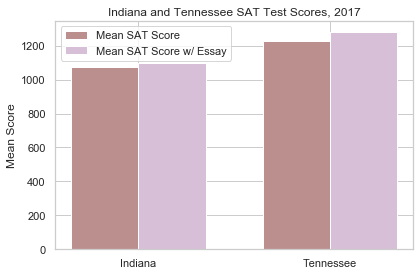

In [199]:
#Indiana vs Tennessee SAT bar chart.
import matplotlib.pyplot as plt
import numpy as np

#Data from College Board, Median SAT scores.
means_sat=[1074,1228]
means_sat_essay=[1098,1283]

#Setting other chart needs.
x = np.arange(1,3)
labels_2=('Indiana','Tennessee')
width=.35
fig, ax = plt.subplots()
rects_sat = ax.bar(x-width/2, means_sat, width, label='Mean SAT Score', color='rosybrown', align='center')
rects_sat_essay = ax.bar(x+width/2, means_sat_essay, width, label='Mean SAT Score w/ Essay', color='thistle', align='center')

#setting labels and tick marks.
ax.set_ylabel('Mean Score')
ax.set_title('Indiana and Tennessee SAT Test Scores, 2017')
ax.set_xticks(x)
ax.set_xticklabels(labels_2)
ax.legend()                         
                           
#Plotting
plt.tight_layout()
plt.show()

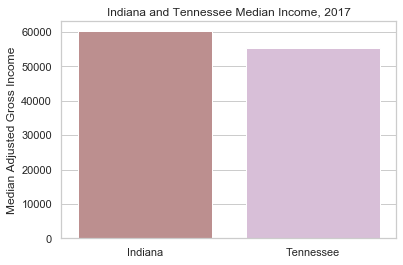

In [193]:
import seaborn as sns
sns.set(style="whitegrid")
x_vals=["Indiana","Tennessee"]
y_vals=[60200,55306]
colors='rosybrown','thistle'
ax = sns.barplot(x=x_vals, y=y_vals, palette = colors,capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd' )
ax.axes.yaxis.label.set_text("Median Adjusted Gross Income")
ax.title.set_text('Indiana and Tennessee Median Income, 2017')

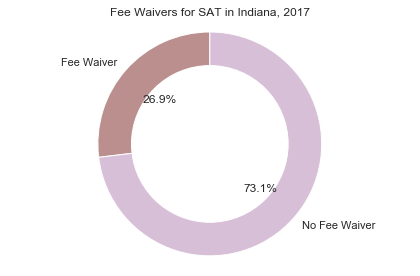

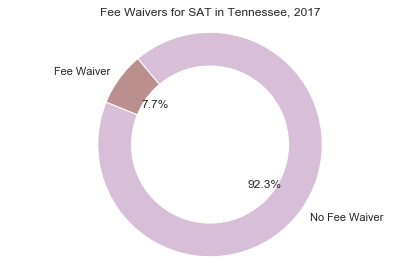

In [196]:
#Fee Waivers for SAT Test in Indiana Piecharts
import matplotlib.pyplot as plt
#Pie chart
labels = ['Fee Waiver', 'No Fee Waiver']
sizes = [12279,33343]
#colors
colors = ['rosybrown','thistle']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

#Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
ax1.title.set_text('Fee Waivers for SAT in Indiana, 2017')
plt.tight_layout()

#Second Pie Chart
labels = ['Fee Waiver', 'No Fee Waiver']
sizes_2 = [270,3225]
#colors
colors = ['rosybrown','thistle']
fig2, ax2 = plt.subplots()
ax2.pie(sizes_2, colors = colors, labels=labels, autopct='%1.1f%%', startangle=130)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 

#Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
ax2.title.set_text('Fee Waivers for SAT in Tennessee, 2017')
plt.tight_layout()
plt.show()